In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Loading data and Augmentation

In [2]:
train_path = "/kaggle/input/fruits-100/train"
test_path="/kaggle/input/fruits-100/val"

from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size =32

train_datagen=ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest'
    

)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(train_path,batch_size=batch_size,target_size=(150,150),class_mode='categorical')

test_generator=test_datagen.flow_from_directory(test_path,batch_size=batch_size,target_size=(150,150),class_mode='categorical')

Found 40000 images belonging to 100 classes.
Found 5000 images belonging to 100 classes.


In [3]:
print(train_generator.class_indices)  # Check if the class labels are inferred correctly
print(train_generator.samples)        # Number of training samples
print(test_generator.samples)         # Number of test samples


{'abiu': 0, 'acai': 1, 'acerola': 2, 'ackee': 3, 'ambarella': 4, 'apple': 5, 'apricot': 6, 'avocado': 7, 'banana': 8, 'barbadine': 9, 'barberry': 10, 'betel_nut': 11, 'bitter_gourd': 12, 'black_berry': 13, 'black_mullberry': 14, 'brazil_nut': 15, 'camu_camu': 16, 'cashew': 17, 'cempedak': 18, 'chenet': 19, 'cherimoya': 20, 'chico': 21, 'chokeberry': 22, 'cluster_fig': 23, 'coconut': 24, 'corn_kernel': 25, 'cranberry': 26, 'cupuacu': 27, 'custard_apple': 28, 'damson': 29, 'dewberry': 30, 'dragonfruit': 31, 'durian': 32, 'eggplant': 33, 'elderberry': 34, 'emblic': 35, 'feijoa': 36, 'fig': 37, 'finger_lime': 38, 'gooseberry': 39, 'goumi': 40, 'grape': 41, 'grapefruit': 42, 'greengage': 43, 'grenadilla': 44, 'guava': 45, 'hard_kiwi': 46, 'hawthorn': 47, 'hog_plum': 48, 'horned_melon': 49, 'indian_strawberry': 50, 'jaboticaba': 51, 'jackfruit': 52, 'jalapeno': 53, 'jamaica_cherry': 54, 'jambul': 55, 'jocote': 56, 'jujube': 57, 'kaffir_lime': 58, 'kumquat': 59, 'lablab': 60, 'langsat': 61, '

In [4]:
import tensorflow as tf
from tensorflow import keras as kt
from tensorflow.keras import layers,Sequential

In [5]:
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten,BatchNormalization

# MODEL BUILDING

In [6]:
from keras.applications.vgg16 import VGG16
conv_base=VGG16( weights='imagenet',include_top=False,input_shape=(150,150,3))


conv_base.trainable = False

'''
set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block4_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False
'''
for layer in conv_base.layers:
  print(layer.name,layer.trainable)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    filepath="vgg16_model_epoch_{epoch:02d}.keras",  # save whole model
    save_weights_only=False,
    save_freq='epoch',
    verbose=1
)


In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import SGD


model = Sequential()
model.add(conv_base)
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(100, activation='softmax'))

model.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


# Train model
with tf.device('/GPU:0'):
    history = model.fit(
        train_generator,
        validation_data=test_generator,
        epochs=150,
        callbacks=[checkpoint]
    
    )

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.0876 - loss: 4.1506
Epoch 1: saving model to vgg16_model_epoch_01.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 512s 400ms/step - accuracy: 0.0877 - loss: 4.1499 - val_accuracy: 0.2714 - val_loss: 2.8659
Epoch 2/150
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.2313 - loss: 3.1433
Epoch 2: saving model to vgg16_model_epoch_02.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 248s 198ms/step - accuracy: 0.2313 - loss: 3.1432 - val_accuracy: 0.3294 - val_loss: 2.6268
Epoch 3/150
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.2700 - loss: 2.9233
Epoch 3: saving model to vgg16_model_epoch_03.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 243s 194ms/step - accuracy: 0.2700 - loss: 2.9233 - val_accuracy: 0.3472 - val_loss: 2.4875
Epoch 4/150
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.2906 - loss: 2.8152
Epoch 4: saving model to vgg16_model_epoch_04.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 249s 198ms/step - accuracy: 0.2906 - los

# Plotting accuracy and loss

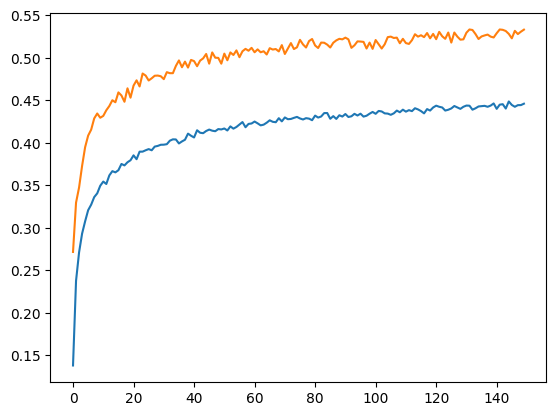

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

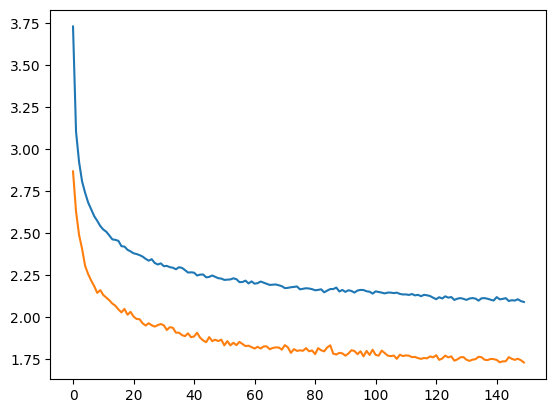

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [11]:
# Save the whole model
model.save("vgg16_full_model.h5")


'''

# Load it back
from tensorflow.keras.models import load_model
loaded_model = load_model("vgg16_full_model.h5")
'''

'\n\n# Load it back\nfrom tensorflow.keras.models import load_model\nloaded_model = load_model("vgg16_full_model.h5")\n'